## Metrics

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# json 파일 불러오기
with open('history/metrics_02_23.json', 'r') as f:
    data = f.readlines()

# json 문자열을 dictionary로 변환
data = [json.loads(line) for line in data]

# 데이터프레임으로 변환
df = pd.DataFrame(data)

In [4]:
#df.columns

Index(['data_time', 'eta_seconds', 'fast_rcnn/cls_accuracy',
       'fast_rcnn/false_negative', 'fast_rcnn/fg_cls_accuracy', 'iteration',
       'loss_box_reg', 'loss_cls', 'loss_mask', 'loss_rpn_cls', 'loss_rpn_loc',
       'lr', 'mask_rcnn/accuracy', 'mask_rcnn/false_negative',
       'mask_rcnn/false_positive', 'roi_head/num_bg_samples',
       'roi_head/num_fg_samples', 'rpn/num_neg_anchors', 'rpn/num_pos_anchors',
       'time', 'timetest', 'total_loss', 'validation_loss'],
      dtype='object')

In [19]:
del df['timetest']
del df['time']
del df['rpn/num_pos_anchors']
del df['rpn/num_neg_anchors']
del df['roi_head/num_fg_samples']
del df['roi_head/num_bg_samples']
del df['mask_rcnn/false_positive']
del df['mask_rcnn/false_negative']
del df['mask_rcnn/accuracy']
del df['iteration']
del df['fast_rcnn/fg_cls_accuracy']
del df['fast_rcnn/false_negative']
del df['fast_rcnn/cls_accuracy']
del df['eta_seconds']
del df['data_time']

In [20]:
#df

,loss_box_reg,loss_cls,loss_mask,loss_rpn_cls,loss_rpn_loc,lr,total_loss,validation_loss
0,0.420520,0.278791,0.203399,0.026369,0.017227,0.000002,0.930057,NaN
1,0.360244,0.184712,0.238427,0.023874,0.016660,0.000005,0.873941,NaN
2,0.446040,0.290542,0.258382,0.026780,0.023409,0.000007,1.006991,NaN
3,0.419906,0.317579,0.247101,0.024454,0.022135,0.000010,1.035907,NaN
4,0.379199,0.281935,0.256533,0.022155,0.024319,0.000012,1.037476,NaN
...,...,...,...,...,...,...,...,...
495,0.495197,0.220218,0.192868,0.034202,0.022661,0.000120,0.944152,NaN
496,0.397883,0.311142,0.230644,0.019164,0.018163,0.000120,1.056813,NaN
497,0.399372,0.228619,0.244359,0.023362,0.020515,0.000120,0.958884,NaN
498,0.426407,0.229222,0.196213,0.021651,0.024737,0.000120,0.889563,NaN


### loss

In [3]:
# .csv 파일을 데이터프레임으로 불러오기
#df = pd.read_csv('history/df_loss.csv')
#df

,Unnamed: 0,loss_box_reg,loss_cls,loss_mask,loss_rpn_cls,loss_rpn_loc,total_loss
0,0,0.460226,3.145686,0.693034,0.650171,0.045374,5.006367
1,1,0.461292,2.671455,0.692692,0.645793,0.044229,4.541778
2,2,0.528438,1.927198,0.692760,0.635135,0.042847,3.719406
3,3,0.490211,1.420728,0.692335,0.621356,0.053511,3.331301
4,4,0.548221,1.294209,0.692467,0.601981,0.049567,3.092495
...,...,...,...,...,...,...,...
10245,10245,0.398722,0.208778,0.205588,0.027903,0.023964,0.961742
10246,10246,0.441983,0.277299,0.199325,0.024175,0.020830,1.031399
10247,10247,0.426372,0.253090,0.254027,0.021816,0.024530,1.060387
10248,10248,0.410533,0.212143,0.257220,0.023463,0.025026,1.008657


In [4]:
# 처음 불러올 때
#loss_box_reg_list = []
#loss_cls_list = []
#loss_mask_list = []
#loss_rpn_cls_list = []
#loss_rpn_loc_list = []
#total_loss_list = []

In [20]:
loss_box_reg_list = loss_box_reg_list + df['loss_box_reg'].astype(float).tolist()
loss_cls_list = loss_cls_list + df['loss_cls'].astype(float).tolist()
loss_mask_list = loss_mask_list + df['loss_mask'].astype(float).tolist()
loss_rpn_cls_list = loss_rpn_cls_list + df['loss_rpn_cls'].astype(float).tolist()
loss_rpn_loc_list = loss_rpn_loc_list + df['loss_rpn_loc'].astype(float).tolist()
total_loss_list = total_loss_list + df['total_loss'].astype(float).tolist()

In [21]:
len(loss_box_reg_list)

11500

In [22]:
# loss 저장 (리스트를 데이터프레임으로 만들기)
df_loss = pd.DataFrame({'loss_box_reg': loss_box_reg_list, 'loss_cls': loss_cls_list, 'loss_mask': loss_mask_list,\
                       'loss_rpn_cls': loss_rpn_cls_list, 'loss_rpn_loc': loss_rpn_loc_list, 'total_loss': total_loss_list})
df_loss.to_csv('history/df_loss.csv', index=True)

In [23]:
iters_01 = []

for i in range(1, len(loss_box_reg_list)+1):
    i = i * 20
    iters_01.append(i)

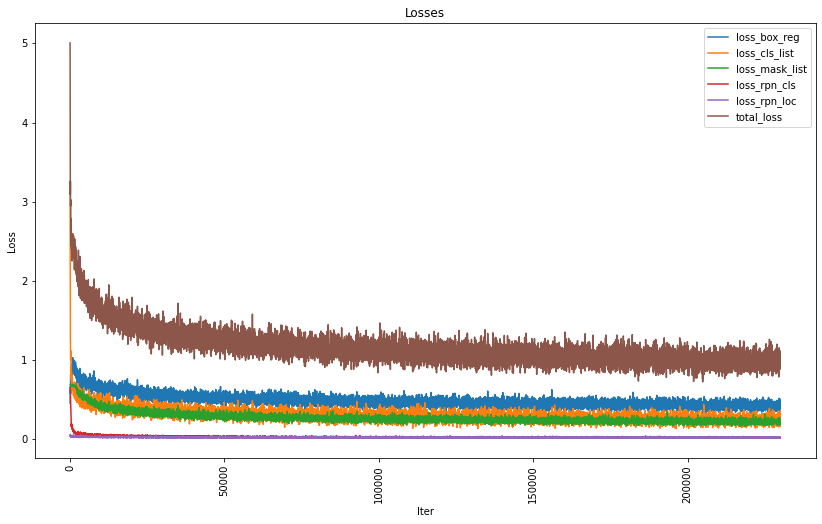

In [24]:
# loss 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters_01, loss_box_reg_list, label='loss_box_reg')
plt.plot(iters_01, loss_cls_list, label='loss_cls_list')
plt.plot(iters_01, loss_mask_list, label='loss_mask_list')
plt.plot(iters_01, loss_rpn_cls_list, label='loss_rpn_cls')
plt.plot(iters_01, loss_rpn_loc_list, label='loss_rpn_loc')
plt.plot(iters_01, total_loss_list, label='total_loss')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
plt.show()

### validation loss

In [9]:
# .csv 파일을 데이터프레임으로 불러오기
#df = pd.read_csv('history/df_val_loss.csv')
#df

,Unnamed: 0,validation_loss
0,0,2.480734
1,1,2.283602
2,2,2.069642
3,3,2.029822
4,4,1.926370
...,...,...
200,200,1.179939
201,201,1.189535
202,202,1.186346
203,203,1.185146


In [25]:
# 처음 불러올 때
#validation_loss_list = []

validation_loss_list = validation_loss_list + df['validation_loss'].astype(float).tolist()

In [26]:
import math

# .json 파일 불러올 때
# 각 요소가 nan이 아닌 것만 새로운 리스트에 추가
validation_loss_list = [x for x in validation_loss_list if not math.isnan(x)]

In [27]:
len(validation_loss_list)

230

In [28]:
# val_loss 저장 (리스트를 데이터프레임으로 만들기)
df_val_loss = pd.DataFrame({'validation_loss': validation_loss_list})
df_val_loss.to_csv('history/df_val_loss.csv', index=True)

In [222]:
#del validation_loss_list[3:26:2]

In [29]:
iters_02 = []

for i in range(1, len(validation_loss_list)+1):
    i = i * 1000
    iters_02.append(i)

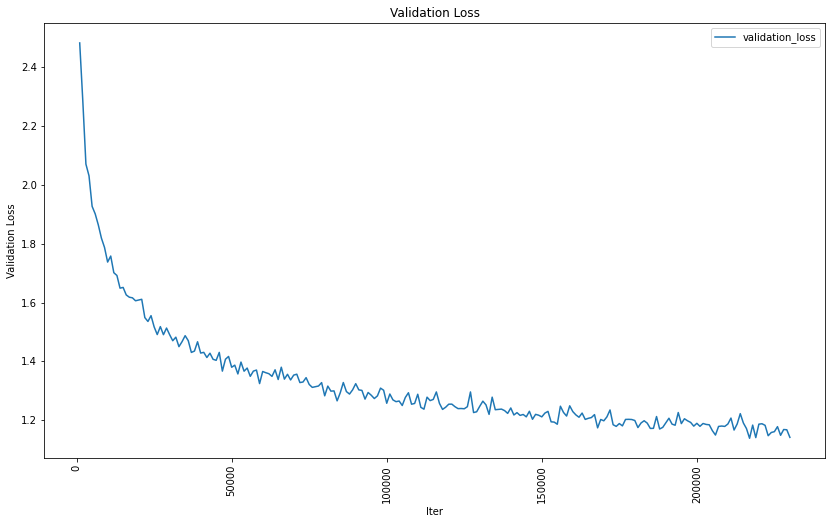

In [30]:
# validation 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters_02, validation_loss_list, label='validation_loss')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('Validation Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

### learning rate

In [14]:
# .csv 파일을 데이터프레임으로 불러오기
#df = pd.read_csv('history/df_lr.csv')
#df

,Unnamed: 0,lr
0,0,0.000004
1,1,0.000008
2,2,0.000012
3,3,0.000016
4,4,0.000020
...,...,...
10245,10245,0.000100
10246,10246,0.000100
10247,10247,0.000100
10248,10248,0.000100


In [31]:
# 처음 불러올 때
#lr_list = []

lr_list = lr_list + df['lr'].astype(float).tolist()

In [32]:
len(lr_list)

11500

In [33]:
# val_loss 저장 (리스트를 데이터프레임으로 만들기)
df_lr = pd.DataFrame({'lr': lr_list})
df_lr.to_csv('history/df_lr.csv', index=True)

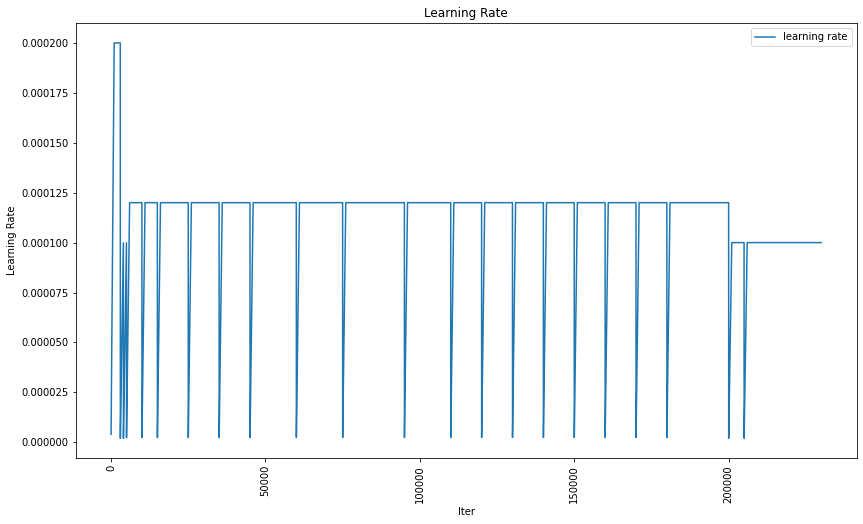

In [34]:
# Learning Rate 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(iters_01, lr_list, label='learning rate')

plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.xlabel('Iter')  # x축 레이블 설정
plt.ylabel('Learning Rate')
plt.title('Learning Rate')
plt.legend()
plt.show()